In [1]:
from torchvision import models, transforms
from torchsummary import summary
import torch
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt


import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))

from lib.src import *
from lib.utils import *

from pytorch_grad_cam import GradCAM, HiResCAM, AblationCAM, ScoreCAM, GradCAMPlusPlus, XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50


c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Top 10 classes:
Siberian husky: 0.4359 (index: 250)
Eskimo dog: 0.3733 (index: 248)
malamute: 0.1502 (index: 249)
timber wolf: 0.0078 (index: 269)
dogsled: 0.0025 (index: 537)
schipperke: 0.0022 (index: 223)
tiger cat: 0.0021 (index: 282)
mosquito net: 0.0021 (index: 669)
white wolf: 0.0019 (index: 270)
dingo: 0.0014 (index: 273)


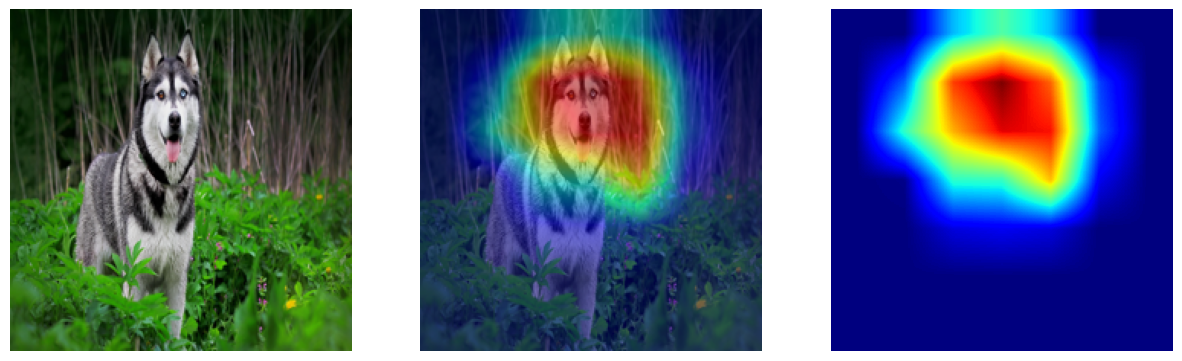

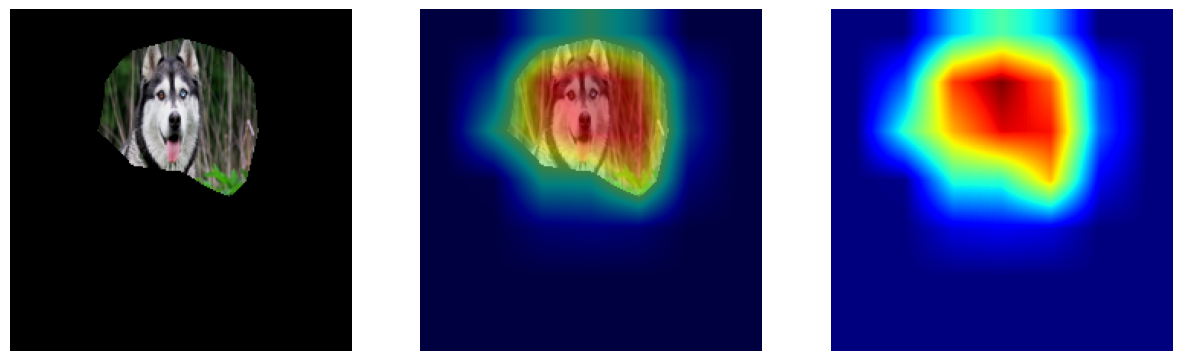

In [2]:

model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()
image_path = 'images/husky.jpg'
input_tensor = get_image_torch(image_path, 224, 224)

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

selected_class_idx = 250
cam_husky_lib = get_xgradcam(input_tensor, model, model.layer4[-1].conv3, selected_class_idx)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5)

del_image = delete_the_least_important_pixels(input_tensor, cam_husky_lib, 0.5)
overlay_plot_torch(del_image, cam_husky_lib, 0.5)

del_image_np = del_image.permute(1, 2, 0).detach().cpu().numpy()
del_image_np = (del_image_np * 255).astype(np.uint8)
del_image_pil = Image.fromarray(del_image_np)
del_image_pil.save('images/del_husky_xgradcam_art.jpg')


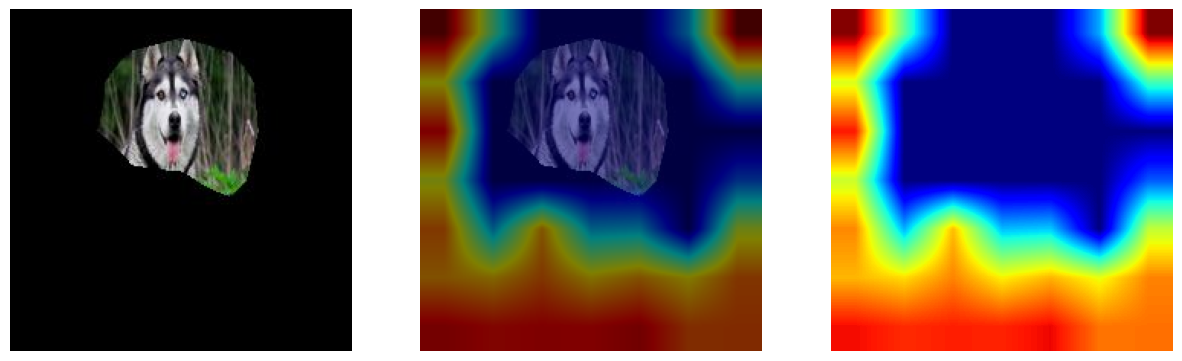

Softmax : 5.4066244047135115e-05
Top 10 classes:
shower cap: 0.2682 (index: 793)
paper towel: 0.0621 (index: 700)
plastic bag: 0.0579 (index: 728)
toilet tissue: 0.0439 (index: 999)
lampshade: 0.0331 (index: 619)
diaper: 0.0287 (index: 529)
handkerchief: 0.0269 (index: 591)
poncho: 0.0226 (index: 735)
parachute: 0.0196 (index: 701)
chambered nautilus: 0.0147 (index: 117)


In [8]:
image_path2 = 'images/del_husky_xgradcam_art.jpg'
input_tensor2 = get_image_torch(image_path2, 224, 224)

cam_wombat = get_xgradcam(input_tensor2, model, model.layer4[-1].conv3, 250)
overlay_plot_torch(input_tensor2.squeeze(), cam_wombat, 0.5)

model.eval()
out = model(input_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax : {out[0, 250].item()}")

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")



c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Top 10 classes:
Siberian husky: 0.4359 (index: 250)
Eskimo dog: 0.3733 (index: 248)
malamute: 0.1502 (index: 249)
timber wolf: 0.0078 (index: 269)
dogsled: 0.0025 (index: 537)
schipperke: 0.0022 (index: 223)
tiger cat: 0.0021 (index: 282)
mosquito net: 0.0021 (index: 669)
white wolf: 0.0019 (index: 270)
dingo: 0.0014 (index: 273)


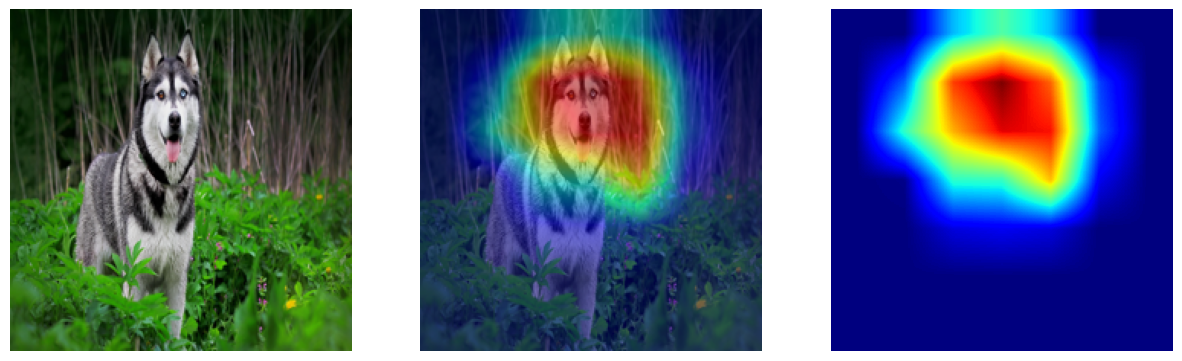

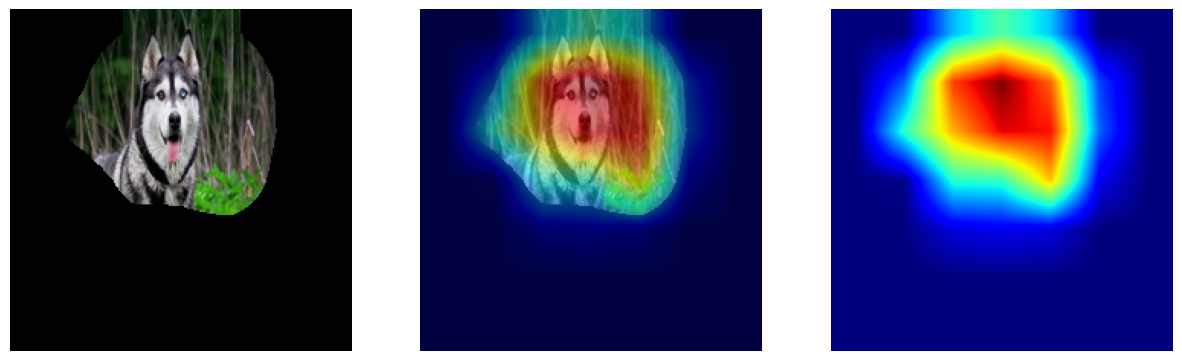

In [10]:

model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()
image_path = 'images/husky.jpg'
input_tensor = get_image_torch(image_path, 224, 224)

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

selected_class_idx = 250
cam_husky_lib = get_xgradcam(input_tensor, model, model.layer4[-1].conv3, selected_class_idx)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5)

del_image = delete_the_least_important_pixels(input_tensor, cam_husky_lib, 0.25)
overlay_plot_torch(del_image, cam_husky_lib, 0.5)

del_image_np = del_image.permute(1, 2, 0).detach().cpu().numpy()
del_image_np = (del_image_np * 255).astype(np.uint8)
del_image_pil = Image.fromarray(del_image_np)
del_image_pil.save('images/del_husky_xgradcam_art2.jpg')


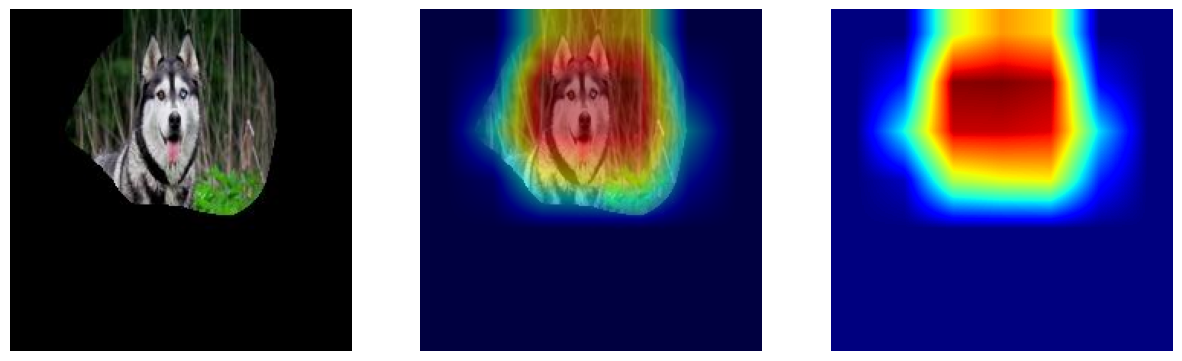

Softmax : 0.09872717410326004
Top 10 classes:
Siberian husky: 0.3204 (index: 250)
Eskimo dog: 0.0837 (index: 248)
malamute: 0.0463 (index: 249)
apron: 0.0443 (index: 411)
bath towel: 0.0206 (index: 434)
mosquito net: 0.0193 (index: 669)
handkerchief: 0.0182 (index: 591)
diaper: 0.0160 (index: 529)
candle: 0.0151 (index: 470)
brassiere: 0.0147 (index: 459)


In [11]:
image_path2 = 'images/del_husky_xgradcam_art2.jpg'
input_tensor2 = get_image_torch(image_path2, 224, 224)

cam_wombat = get_xgradcam(input_tensor2, model, model.layer4[-1].conv3, 250)
overlay_plot_torch(input_tensor2.squeeze(), cam_wombat, 0.5)

model.eval()
out = model(input_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax : {out[0, 250].item()}")

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")



Top 10 classes:
Siberian husky: 0.4359 (index: 250)
Eskimo dog: 0.3733 (index: 248)
malamute: 0.1502 (index: 249)
timber wolf: 0.0078 (index: 269)
dogsled: 0.0025 (index: 537)
schipperke: 0.0022 (index: 223)
tiger cat: 0.0021 (index: 282)
mosquito net: 0.0021 (index: 669)
white wolf: 0.0019 (index: 270)
dingo: 0.0014 (index: 273)


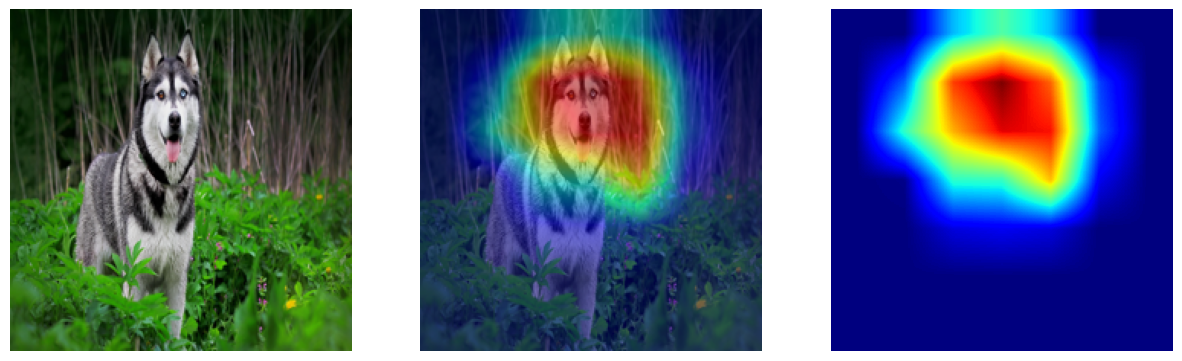

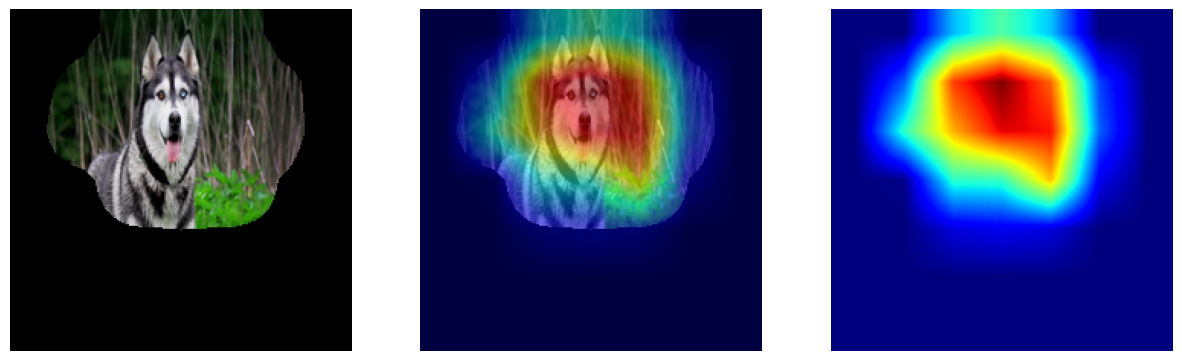

In [12]:

model = models.resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
model.eval()
image_path = 'images/husky.jpg'
input_tensor = get_image_torch(image_path, 224, 224)

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")

selected_class_idx = 250
cam_husky_lib = get_xgradcam(input_tensor, model, model.layer4[-1].conv3, selected_class_idx)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5)

del_image = delete_the_least_important_pixels(input_tensor, cam_husky_lib, 0.1)
overlay_plot_torch(del_image, cam_husky_lib, 0.5)

del_image_np = del_image.permute(1, 2, 0).detach().cpu().numpy()
del_image_np = (del_image_np * 255).astype(np.uint8)
del_image_pil = Image.fromarray(del_image_np)
del_image_pil.save('images/del_husky_xgradcam_art3.jpg')


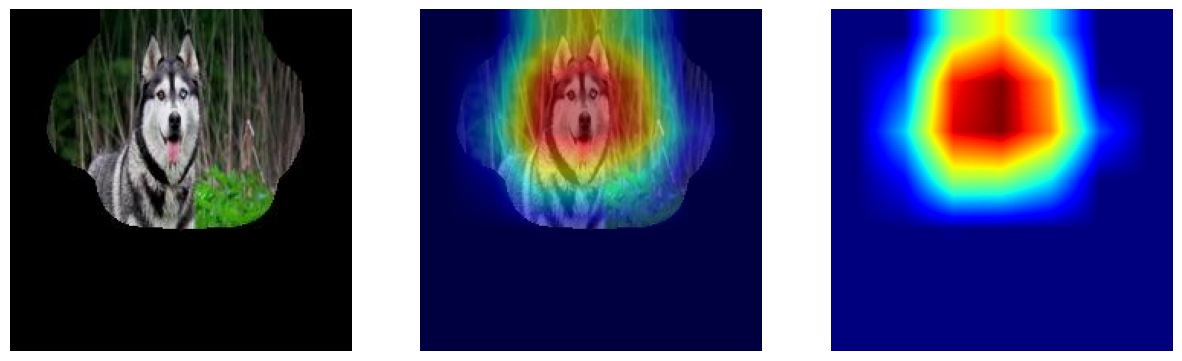

Softmax : 0.16405732929706573
Top 10 classes:
Siberian husky: 0.2726 (index: 250)
Eskimo dog: 0.0812 (index: 248)
apron: 0.0592 (index: 411)
shower cap: 0.0455 (index: 793)
diaper: 0.0395 (index: 529)
malamute: 0.0333 (index: 249)
bath towel: 0.0244 (index: 434)
bulletproof vest: 0.0235 (index: 465)
bib: 0.0231 (index: 443)
wall clock: 0.0202 (index: 892)


In [13]:
image_path2 = 'images/del_husky_xgradcam_art3.jpg'
input_tensor2 = get_image_torch(image_path2, 224, 224)

cam_wombat = get_xgradcam(input_tensor2, model, model.layer4[-1].conv3, 250)
overlay_plot_torch(input_tensor2.squeeze(), cam_wombat, 0.5)

model.eval()
out = model(input_tensor2.unsqueeze(0))
out = torch.nn.functional.softmax(out, dim=1)
print(f"Softmax : {out[0, 250].item()}")

output = model(input_tensor.unsqueeze(0))
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top_probs, top_idxs = torch.topk(probabilities, 10)

class_names = np.loadtxt('imagenet_classes.txt', str, delimiter='\t')

top_classes = {idx.item(): (class_names[idx], prob.item()) for idx, prob in zip(top_idxs, top_probs)}
print("Top 10 classes:")
for idx, (class_name, prob) in top_classes.items():
    print(f"{class_name}: {prob:.4f} (index: {idx})")



In [ ]:
from pytorch_grad_cam import GradCAM, HiResCAM, AblationCAM, ScoreCAM, GradCAMPlusPlus, XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

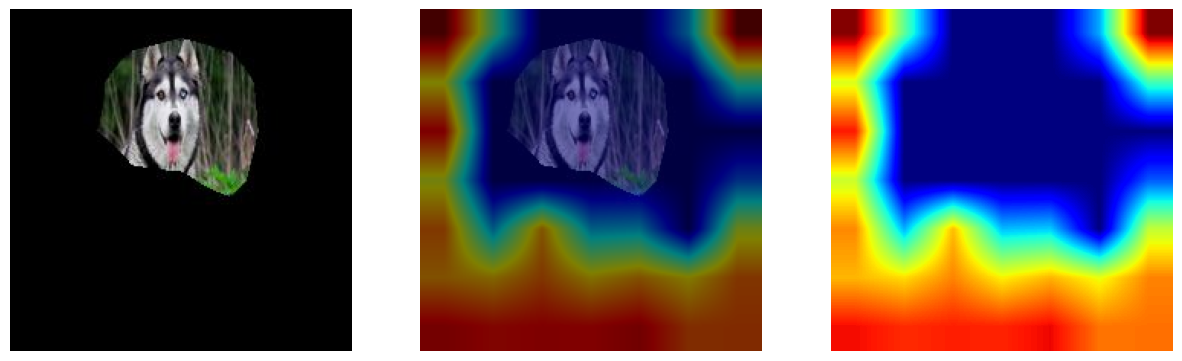

In [9]:
# Biblioteka Husky 50%

input_tensor = get_image_torch('images/del_husky_xgradcam_art.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(250)]

with XGradCAM(model=model, target_layers=target_layers) as cam:
  cam_husky_lib = cam(input_tensor=input_tensor, targets=targets).squeeze(0)
overlay_plot_torch(input_tensor.squeeze(), cam_husky_lib, 0.5, 'images_prezentacja/xgradcam_husky05_lib.png')

